In [1]:
!pip install -U scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.2/9.2 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/9.2 MB 6.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.2 MB 7.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.2 MB 7.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.2 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.2 MB 7.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/9.2 MB 7.4 MB/s eta 0:00:01
   ------------ --------------------------- 2.8/9.2 MB 7.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.2 MB 7.6 MB/s eta 0:00:01
   --------------- ----------

In [2]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Perceptron
from sklearn . neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import sys
import tensorflow as tf
from tensorflow import keras
import os


# 1

In [3]:
df = keras.datasets.fashion_mnist

In [5]:
display (df)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Alexis\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

# 2

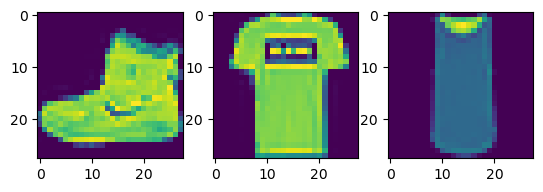

In [8]:
(xtrain, ytrain), (xtest, ytest) = df.load_data()

plt.subplot(131)
plt.imshow(xtrain[0])
plt.subplot(132)
plt.imshow(xtrain[1])
plt.subplot(133)
plt.imshow(xtrain[2])

# 3

In [10]:
xtrain = xtrain/255
xtest = xtest/255

# 4

In [13]:
#print("echatilion d'entrainement :", '\n', ytrain.value_counts() )
#print('\n', "echatilion de test :", '\n', ytest.value_counts() )

xtrain.shape

(60000, 28, 28)

In [14]:
xtest.shape

(10000, 28, 28)

# 5

In [15]:
mdl = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, kernel_initializer="he_normal"),
 keras.layers.LeakyReLU(),
 keras.layers.Dense(100, kernel_initializer="he_normal"),
 keras.layers.LeakyReLU(),
 keras.layers.Dense(10, activation="softmax")
])

# 6

In [17]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

# 7

In [20]:
model = mdl.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest));


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [21]:
mdl.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=1e-3),
 metrics=["accuracy"])

model = mdl.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest));



Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2839 - accuracy: 0.6036 - val_loss: 0.8860 - val_accuracy: 0.6927
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7787 - accuracy: 0.7331 - val_loss: 0.7259 - val_accuracy: 0.7448
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6722 - accuracy: 0.7704 - val_loss: 0.6537 - val_accuracy: 0.7737
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6159 - accuracy: 0.7899 - val_loss: 0.6135 - val_accuracy: 0.7865
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5792 - accuracy: 0.8013 - val_loss: 0.5845 - val_accuracy: 0.7961
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5527 - accuracy: 0.8112 - val_loss: 0.5617 - val_accuracy: 0.8047
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5326 - accuracy: 0.8173 - val_loss: 0.5480 - val_ac

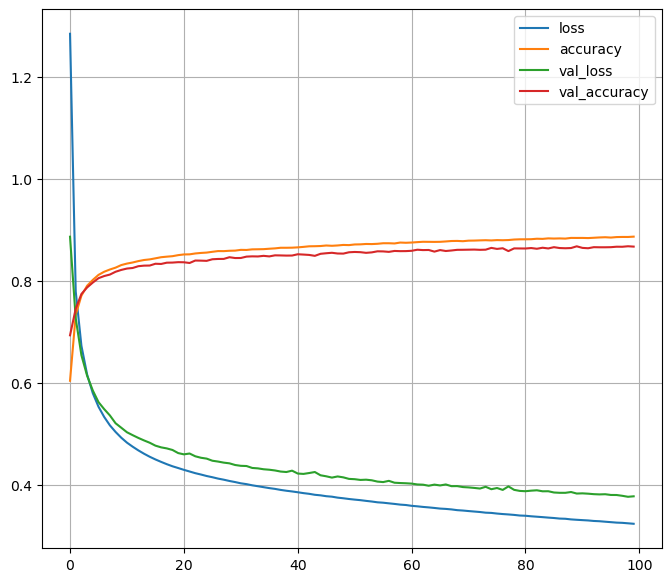

In [22]:
pd.DataFrame(model.history).plot(figsize=(8, 7))
plt.grid(True)
plt.show()

# 8

In [24]:
mdl = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
    ])
mdl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [25]:
mdl.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3),
 metrics=["accuracy"])

model = mdl.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest));

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8455 - accuracy: 0.7187 - val_loss: 0.5975 - val_accuracy: 0.7945
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5711 - accuracy: 0.8030 - val_loss: 0.5194 - val_accuracy: 0.8184
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5131 - accuracy: 0.8204 - val_loss: 0.4836 - val_accuracy: 0.8290
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4779 - accuracy: 0.8321 - val_loss: 0.4607 - val_accuracy: 0.8376
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4524 - accuracy: 0.8415 - val_loss: 0.4439 - val_accuracy: 0.8443
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4346 - accuracy: 0.8471 - val_loss: 0.4316 - val_accuracy: 0.8486
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4209 - accuracy: 0.8526 - val_loss: 0.4226 - val_ac

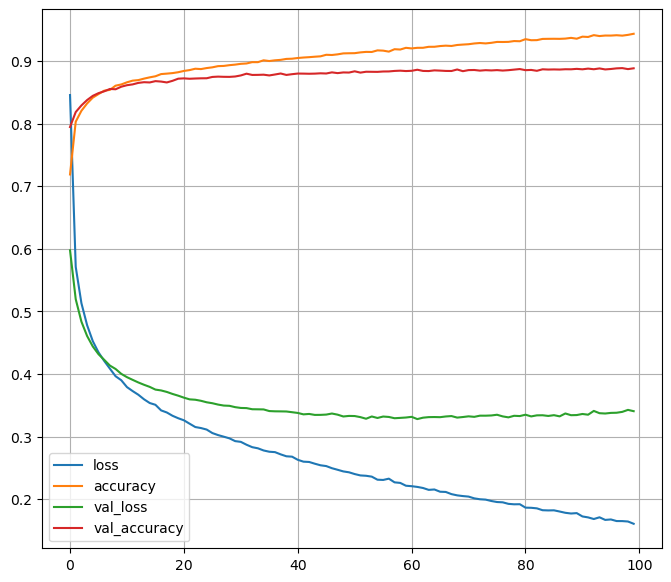

In [30]:
pd.DataFrame(model.history).plot(figsize=(8, 7))
plt.grid(True)
plt.show()

# 9

Sans normalisation : loss: 0.3232 - accuracy: 0.8862 - val_loss: 0.3771 - val_accuracy: 0.8666

Avec normalisation : loss: 0.1607 - accuracy: 0.9434 - val_loss: 0.3405 - val_accuracy: 0.8883

# 10

In [27]:
ypred = mdl.predict(xtest)


confusion = confusion_matrix(ytest, ypred)
print("Matrice de confusion :\n", confusion)

313/313 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

# 11

In [29]:
xvalid, xtrain = xtrain[:5000], xtrain[5000:]
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [31]:
def split_dataset(x, y):
    y5or6 = (y == 5) | (y == 6)
    yA = y[~y5or6]
    yA[yA > 6] -= 2
    yB = (y[y5or6] == 6).astype(np.float32)
    return ((x[~y5or6], yA),(x[y5or6], yB))

(xtrain_A, ytrain_A), (xtrain_B, ytrain_B) = split_dataset(xtrain, ytrain)
(xvalid_A, yvalid_A), (xvalid_B, yvalid_B) = split_dataset(xvalid, yvalid)
(xtest_A, ytest_A), (xtest_B, ytest_B) = split_dataset(xtest, ytest)
xtrain_B = xtrain_B[:200]
ytrain_B = ytrain_B[:200]


In [32]:
mdl_A = keras.models.Sequential()
mdl_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    mdl_A.add(keras.layers.Dense(n_hidden, activation="selu"))
mdl_A.add(keras.layers.Dense(8, activation="softmax"))


In [33]:
mdl_A.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=1e-3),
 metrics=["accuracy"])

In [35]:
model_A = mdl.fit(xtrain_A, ytrain_A, epochs=100, validation_data=(xvalid_A, yvalid_A));

Epoch 1/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9564 - val_loss: 0.1132 - val_accuracy: 0.9584
Epoch 2/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.1213 - accuracy: 0.9581 - val_loss: 0.1117 - val_accuracy: 0.9606
Epoch 3/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.1187 - accuracy: 0.9586 - val_loss: 0.1122 - val_accuracy: 0.9609
Epoch 4/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.1168 - accuracy: 0.9596 - val_loss: 0.1109 - val_accuracy: 0.9601
Epoch 5/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.1128 - accuracy: 0.9614 - val_loss: 0.1105 - val_accuracy: 0.9594
Epoch 6/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.1103 - accuracy: 0.9622 - val_loss: 0.1089 - val_accuracy: 0.9606
Epoch 7/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.1091 - accuracy: 0.9616 - val_loss: 0.1083 - val_ac

In [37]:
mdl_A.save("my_model_A.h5")

C:\Users\Alexis\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
mdl_B = keras.models.Sequential()
mdl_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    mdl_B.add(keras.layers.Dense(n_hidden, activation="selu"))
mdl_B.add(keras.layers.Dense(1, activation="sigmoid"))
mdl_B.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [39]:
mdl_B.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=1e-3),
 metrics=["accuracy"])

model_B = mdl_B.fit(xtrain_B, ytrain_B, epochs=20,validation_data=(xvalid_B, yvalid_B))


Epoch 1/20
7/7 [==============================] - 1s 33ms/step - loss: 0.6416 - accuracy: 0.6550 - val_loss: 0.5025 - val_accuracy: 0.8144
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.4301 - accuracy: 0.8900 - val_loss: 0.4092 - val_accuracy: 0.8590
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3463 - accuracy: 0.9300 - val_loss: 0.3494 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2897 - accuracy: 0.9550 - val_loss: 0.3060 - val_accuracy: 0.9229
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2490 - accuracy: 0.9650 - val_loss: 0.2742 - val_accuracy: 0.9351
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2188 - accuracy: 0.9650 - val_loss: 0.2476 - val_accuracy: 0.9493
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.1943 - accuracy: 0.9800 - val_loss: 0.2272 - val_accuracy: 0.9523
Epoch 8/20
7/7 [===========

In [41]:
mdl_B.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [42]:
mdl_A = keras.models.load_model("my_model_A.h5")
mdl_A.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 8)                

In [43]:
mdl_A.get_config()

{'name': 'sequential_2',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_2_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_2',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'dtype': 'float32',
    'units': 300,
    'activation': 'selu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_na

In [44]:
model_BonA = keras.models.Sequential(mdl_A.layers[:-1])
model_BonA.add(keras.layers.Dense(1, activation="sigmoid"))

model_Aclone = keras.models.clone_model(mdl_A)
model_Aclone.set_weights(mdl_A.get_weights())

In [45]:
for layer in model_BonA.layers[:-1]:
    layer.trainable = True
model_BonA.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3),
 metrics=["accuracy"])
model_BA = model_BonA.fit(xtrain_B, ytrain_B, epochs=16,
 validation_data=(xvalid_B, yvalid_B))

Epoch 1/16
7/7 [==============================] - 1s 31ms/step - loss: 0.6043 - accuracy: 0.7250 - val_loss: 0.5290 - val_accuracy: 0.7535
Epoch 2/16
7/7 [==============================] - 0s 10ms/step - loss: 0.4673 - accuracy: 0.8150 - val_loss: 0.4256 - val_accuracy: 0.8266
Epoch 3/16
7/7 [==============================] - 0s 10ms/step - loss: 0.3730 - accuracy: 0.9050 - val_loss: 0.3563 - val_accuracy: 0.8763
Epoch 4/16
7/7 [==============================] - 0s 10ms/step - loss: 0.3095 - accuracy: 0.9250 - val_loss: 0.3028 - val_accuracy: 0.9199
Epoch 5/16
7/7 [==============================] - 0s 10ms/step - loss: 0.2622 - accuracy: 0.9550 - val_loss: 0.2649 - val_accuracy: 0.9412
Epoch 6/16
7/7 [==============================] - 0s 10ms/step - loss: 0.2266 - accuracy: 0.9650 - val_loss: 0.2330 - val_accuracy: 0.9564
Epoch 7/16
7/7 [==============================] - 0s 10ms/step - loss: 0.1982 - accuracy: 0.9700 - val_loss: 0.2095 - val_accuracy: 0.9665
Epoch 8/16
7/7 [===========

In [46]:
mdl_B.evaluate(xtest_B, ytest_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9795


[0.11712478846311569, 0.9794999957084656]

In [47]:
model_BonA.evaluate(xtest_B, ytest_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9795


[0.11498380452394485, 0.9794999957084656]